In [1]:
!pip install --upgrade pip
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 15.3 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
Looking in indexes: https://download.pytorch.org/whl/cu118


In [2]:
!pip install torch torchvision torchaudio


In [ ]:
!pip install diffusers transformers accelerate safetensors huggingface_hub einops
# optional: for faster attention / memory improvements (if supported on your system)
!pip install xformers  # may fail on some systems, it's optional


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.9/122.9 MB 54.5 MB/s  0:00:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 899.7/899.7 MB 28.8 MB/s  0:00:15
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 594.3/594.3 MB 42.3 MB/s  0:00:10
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 113.2 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.0/88.0 MB 55.8 MB/s  0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 954.8/954.8 kB 39.6 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.1/193.1 MB 63.5 MB/s  0:00:03
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 41.2 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.6/63.6 MB 53.9 MB/s  0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 267.5/267.5 MB 33.2 MB/s  0:00:07
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.2/288.2 MB 64.9 MB/s  0:00:04
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.3/322.3 MB 25.5 MB/s  0:00:10
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.3/39.3 MB 97.5 MB/s  0:00:

In [12]:
# txt2img.py
import torch
from diffusers import StableDiffusionPipeline

def main():
    model_id = "runwayml/stable-diffusion-v1-5"  # stable, good for beginners

    # If you have a GPU and want to use mixed precision:
    device = "cuda" if torch.cuda.is_available() else "cpu"
    dtype = torch.float16 if device == "cuda" else torch.float32

    pipe = StableDiffusionPipeline.from_pretrained(
        model_id,
        torch_dtype=dtype,
        safety_checker=None  # optional: remove to keep safety checks; recommended to keep
    )
    pipe = pipe.to(device)

    prompt = "make the image of lord shiva in the water drop"
    generator = torch.Generator(device=device).manual_seed(42)

    image = pipe(prompt, num_inference_steps=30, guidance_scale=7.5, generator=generator).images[0]
    image.save("output_sd_v1_5.png")
    print("Saved output_sd_v1_5.png")

if __name__ == "__main__":
    main()


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion.StableDiffusionPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


  0%|          | 0/30 [00:00<?, ?it/s]

Saved output_sd_v1_5.png


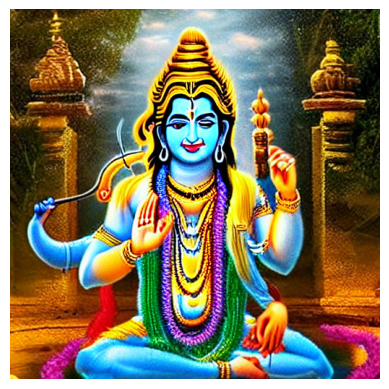

In [13]:
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open("output_sd_v1_5.png")
plt.imshow(img)
plt.axis("off")
plt.show()
